In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coca = pd.read_excel("C:\\Users\\farhanfarooq\\Desktop\\work files\\ExcelR\\Assignments\\Assign.Forecasting\\CocaCola_Sales_Rawdata.xlsx")
coca.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [8]:
quarter=['Q1','Q2','Q3','Q4']
n=coca['Quarter'][0]
n[0:2]
coca['quarter']=0

In [9]:
for i in range(42):
    n=coca['Quarter'][i]
    coca['quarter'][i]=n[0:2]

<ipython-input-9-2561dcae2483>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coca['quarter'][i]=n[0:2]
C:\Users\farhanfarooq\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
dummy=pd.DataFrame(pd.get_dummies(coca['quarter']))
coca1=pd.concat((coca,dummy),axis='columns')

In [12]:
coca1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [14]:
t=np.arange(1,43)
coca1['t']=t
coca1['t_square']=coca1['t']*coca1['t']

In [16]:
log_Sales=np.log(coca1['Sales'])
coca1['log_Sales']=log_Sales

In [17]:
coca1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [48]:
coca1.to_excel('PREDICTED_Coca_DATA.xlsx')

<AxesSubplot:>

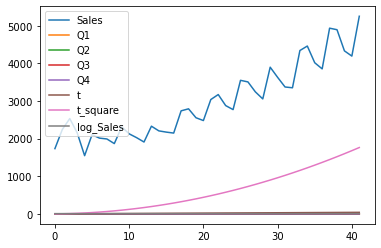

In [19]:
coca1.plot()

<AxesSubplot:>

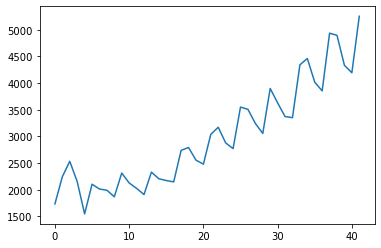

In [20]:
coca1.Sales.plot()

In [21]:
Train=coca1.head(38)
Test=coca1.tail(4)

In [22]:
#import models
import statsmodels.formula.api as smf

In [35]:
#Linear Model
linear= smf.ols('Sales~t',data=Train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(Test['t'])))
rmse_lin=np.sqrt((np.mean(np.array(Test['Sales'])-np.array(predlin))**2))
rmse_lin

421.1787876002277

In [38]:
#Exponential 
exp=smf.ols('log_Sales~t',data=Train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

466.24797310672255

In [28]:
#Quadratic
Quad=smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad=pd.Series(Quad.predict(pd.DataFrame(Test[['t','t_square']])))
rmse_Quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad                  

475.56183518315254

In [29]:
#Additive Seasonality Quadratic
add_sea_quad= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=Train).fit()
pred_add=pd.Series(add_sea_quad.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmse_add=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add))**2))
rmse_add

1860.0238154547278

In [30]:
#Multiplicative Seasonality
mul_sea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul= pd.Series(mul_sea.predict(pd.DataFrame(Test[['Q1','Q2','Q3','Q4']])))
rmse_mul= np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul)))**2))
rmse_mul

1963.389640077973

In [44]:
#Multiplicative Additive Seasonality 
mul_add_sea= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
pred_mul_add_sea= pd.Series(mul_add_sea.predict(pd.DataFrame(Test[['t','Q1','Q2','Q3','Q4']])))
rmse_mul_add_sea=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

225.52439049826944

In [46]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_lin","rmse_exp","rmse_Quad","rmse_add","rmse_mul","rmse_mul_add_sea"]),"RMSE_Values":pd.Series([rmse_lin,rmse_exp,rmse_Quad,rmse_add,rmse_mul,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
5,rmse_mul_add_sea,225.524390
0,rmse_lin,421.178788
1,rmse_exp,466.247973
2,rmse_Quad,475.561835
3,rmse_add,1860.023815
4,rmse_mul,1963.389640


# Prediction for new Time Period

In [51]:
predict_data = pd.read_excel('PREDICTED_Coca_DATA.xlsx')
predict_data.head()

,Unnamed: 0,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [55]:
#Build the model on entire data set
model_full = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=coca1).fit()

In [62]:
pred_new  = pd.Series(mul_add_sea.predict(predict_data))
pred_new

0     7.345823
1     7.587884
2     7.574280
3     7.498859
4     7.440236
5     7.682297
6     7.668693
7     7.593272
8     7.534649
9     7.776710
10    7.763106
11    7.687685
12    7.629062
13    7.871123
14    7.857519
15    7.782098
16    7.723475
17    7.965536
18    7.951932
19    7.876511
20    7.817889
21    8.059949
22    8.046345
23    7.970924
24    7.912302
25    8.154362
26    8.140758
27    8.065338
28    8.006715
29    8.248776
30    8.235171
31    8.159751
32    8.101128
33    8.343189
34    8.329584
35    8.254164
36    8.195541
37    8.437602
38    8.423998
39    8.348577
40    8.289954
41    8.532015
dtype: float64

In [67]:
predict_data["forecasted_Sales"] = np.exp(pd.Series(pred_new))
predict_data

,Unnamed: 0,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
0,0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,1549.709886
1,1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,1974.131516
2,2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,1947.457062
3,3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,1805.980615
4,4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,1703.152319
5,5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,2169.597484
6,6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,2140.281894
7,7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,1984.797349
8,8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,1871.787647
9,9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,2384.417251


<AxesSubplot:>

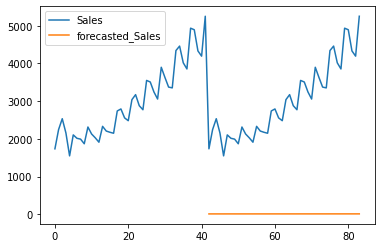

In [68]:
new_var[['Sales','forecasted_Sales']].reset_index(drop=True).plot()